<h1><center>Deep Learning</center></h1>
<h2><center>Assignment # 2</center></h2>
<h3><center>Task # 2</center></h3>

In [6]:
# Include libraries which may use in implementation
import numpy as np
import random
import sklearn.datasets as ds
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
# Create a Neural_Network class
class Neural_Network(object):        
    def __init__(self,inputSize = 2,hiddenlayer = 3 ,outputSize = 1 ):        
        # size of layers
        self.inputSize = inputSize
        self.outputSize = outputSize 
        self.hiddenLayer = hiddenlayer
        #weights
        self.W1 = np.random.rand(self.inputSize+1,self.outputSize)
        # randomly initialize W1 using random function of numpy
        # size of the wieght will be (inputSize +1, hiddenlayer) that +1 is for bias    
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # randomly initialize W2 using random function of numpy
        # size of the wieght will be (hiddenlayer +1, outputSize) that +1 is for bias    
        
    def feedforward(self, X):
        #forward propagation through our network
        # dot product of X (input) and set of weights
        # apply activation function (i.e. whatever function was passed in initialization)  
        #temp_x = self.sigmoid(np.dot(self.sigmoid(np.dot(X , self.W1)),self.W2))
        temp_x = np.dot(X , self.W1)
        z = self.sigmoid(temp_x)
        z2 = np.dot(z , self.W2)
        z2 = self.tanh(z2)
        
        return z2 # return your answer with as a final output of the network

    def sigmoid(self, s):
        # activation function
        return 1/(1+np.exp(-s))  # apply sigmoid function on s and return it's value

    def sigmoid_derivative(self, s):
        #derivative of sigmoid
        return self.sigmoid(s)* (1 - self.sigmoid(s)) # apply derivative of sigmoid on s and return it's value 
    
    def tanh(self, s):
        # activation function
        return np.tanh(s) # apply tanh function on s and return it's value

    def tanh_derivative(self, s):
        #derivative of tanh
        return 1.0 - np.tanh(s)**2 # apply derivative of tanh on s and return it's value
    
    def relu(self, s):
        # activation function
        if s >= 0 :
            return s
        else:
            return 0 # apply relu function on s and return it's value

    def relu_derivative(self, s):
        #derivative of relu
        if s >= 0:
            return 1
        else:
            return 0
         # apply derivative of relu on s and return it's value

    def backwardpropagate(self,X, Y, y_pred, lr):
        # backward propagate through the network
        # compute error in output which is loss compute cross entropy loss function
        # applying derivative of that applied activation function to the error
        # adjust set of weights
        sig_y_pred = self.sigmoid_derivative(y_pred)
        error = self.crossentropy_derivative(Y , y_pred)
    def crossentropy_derivative(self, Y, Y_pred):
        return Y * (Y_pred - 1) + (1 - Y) * Y_pred
    def crossentropy(self, Y, Y_pred):
        # compute error based on crossentropy loss 
        return -np.mean(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred)) #error

   # def train(self, trainX, trainY,epochs = 100, learningRate = 0.001, plot_err = True ,validationX = Null, validationY = Null):
        # feed forward trainX and trainY and recivce predicted value
        # backpropagation with trainX, trainY, predicted value and learning rate.
        # if validationX and validationY are not null than show validation accuracy and error of the model by printing values.
        # plot error of the model if plot_err is true

    def predict(self, testX):
        # predict the value of testX
        testY = self.feedforward(testX)
        return testY
    
    def accuracy(self, testX, testY):
        # predict the value of trainX
        count = 0
        
        test_hat_y = np.around(self.predict(testX))
        #round(test_hat_y)
        for i in range(len(testY)):
            if testY[i] == test_hat_y[i]:
                count = count + 1
        #compute accuracy, print it and show in the form of picture
        accuracy = float(count/len(testY)) * 100
        #print(testY , test_hat_y)
        return accuracy # return accuracy    
        
    def saveModel(self,name):
        np.savetxt(name, self.W1, fmt='%f')
        np.savetxt(name, self.W2, fmt="%s")

        
    def loadModel(self,name):
        W1 = np.loadtxt(name, dtype=float)
        W2 = np.loadtxt(name, dtype=float)
        print(W1,W2)

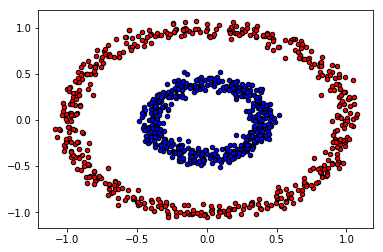

In [8]:
data, label = ds.make_circles(n_samples=1000, factor=.4, noise=0.05)

#Lets visualize the dataset
reds = label == 0
blues = label == 1
plt.scatter(data[reds, 0], data[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(data[blues, 0], data[blues, 1], c="blue", s=20, edgecolor='k')
plt.show()


In [5]:

#Note: shuffle this dataset before dividing it into three parts

# Distribute this data into three parts i.e. training, validation and testing
trainX = ?# training data point
trainY = ?# training lables

validX = ? # validation data point
validY = ?# validation lables

testX = ?# testing data point
testY = ?# testing lables




NameError: name 'trainX' is not defined

In [ ]:
model = Neural_Network(2,1)
# try different combinations of epochs and learning rate
model.train(trainX, trainY, epochs = 150, learningRate = 0.001, validationX = validX, validationY = validY)

In [ ]:
#save the best model which you have trained, 
model.save('bestmodel.mdl')

#### Note: This below section will be used for the evaluation of this task, we need your model and we will run script below to evaluated your model

In [ ]:
# create class object
mm = Neural_Network()
# load model which will be provided by you
mm.load('bestmodel.mdl')
# check accuracy of that model
mm.accuracy(testX,testY)


